In [156]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

In [234]:
dirs = ['/home/arpan-john/Desktop/cans/GRBC_bn091022752/current',
        '/home/arpan-john/Desktop/cans/GRBC_bn091208623/current',
        '/home/arpan-john/Desktop/cans/GRBC_bn110102432/current',
        '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current',
        '/home/arpan-john/Desktop/cans/GRBC_bn240323372/current',
        '/home/arpan-john/Desktop/cans/SFLAREC_bn131122417/current',
        '/home/arpan-john/Desktop/cans/SFLAREC_bn140706303/current',
        '/home/arpan-john/Desktop/cans/SFLAREC_bn150426958/current',
        '/home/arpan-john/Desktop/cans/SFLAREC_bn150917046/current',
        '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current',
        '/home/arpan-john/Desktop/cans/SGRC_bn121210642/current',]

In [334]:
dir = dirs[-2]

In [335]:
en = dir.split('/')[-2]
print(en)

SFLAREC_bn181104784


In [336]:
import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])
# bright_nais.append('n3')
print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)

NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

# NaI_detectors =  NaI_detectors[0:2]
# rsp_NaI_files =  rsp_NaI_files[0:2]
# rsp2_NaI_files = rsp2_NaI_files[0:2]

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_trigdat_all_bn181104784_v01.fit']
bn181104784/current/glg
 
The brightest NaI detector is n1 - Source angle is: 31 deg
The brightest 3 NaI detectors are n1 ( 31 deg) n3 ( 40 deg) n0 ( 41 deg)
The brightest BGO detector is b0 ( 35 deg )
n1
['n1', 'n3', 'n0']
['b0']
['/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_b0_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_b1_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n0_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n1_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n2_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n3_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n4_bn181104784_v00.fit', '/home/arpan-john/Desktop/

n3


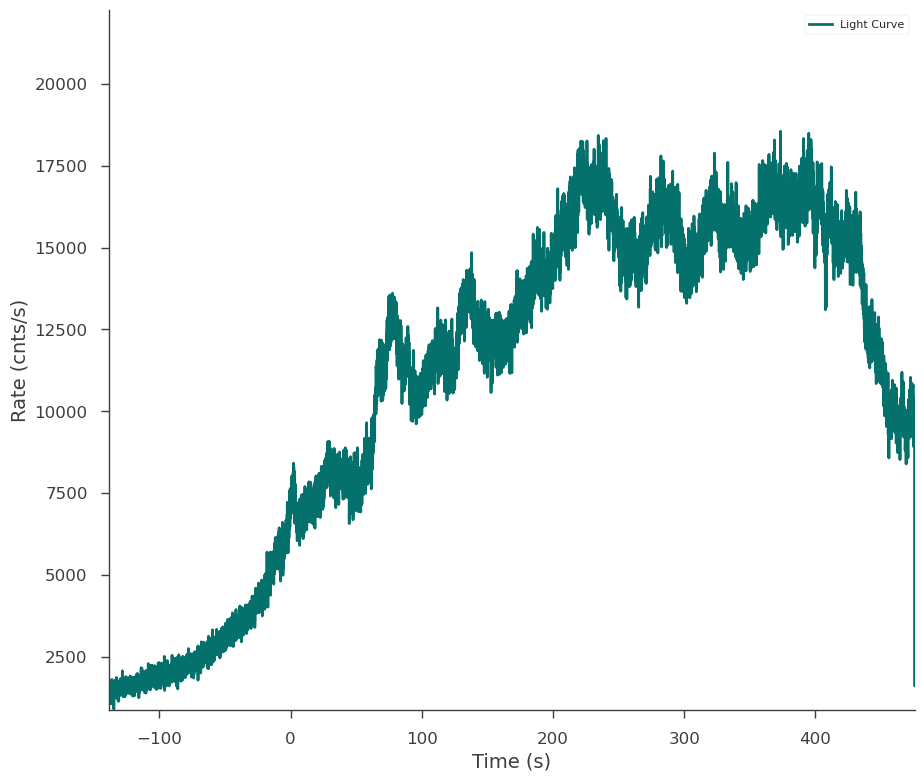

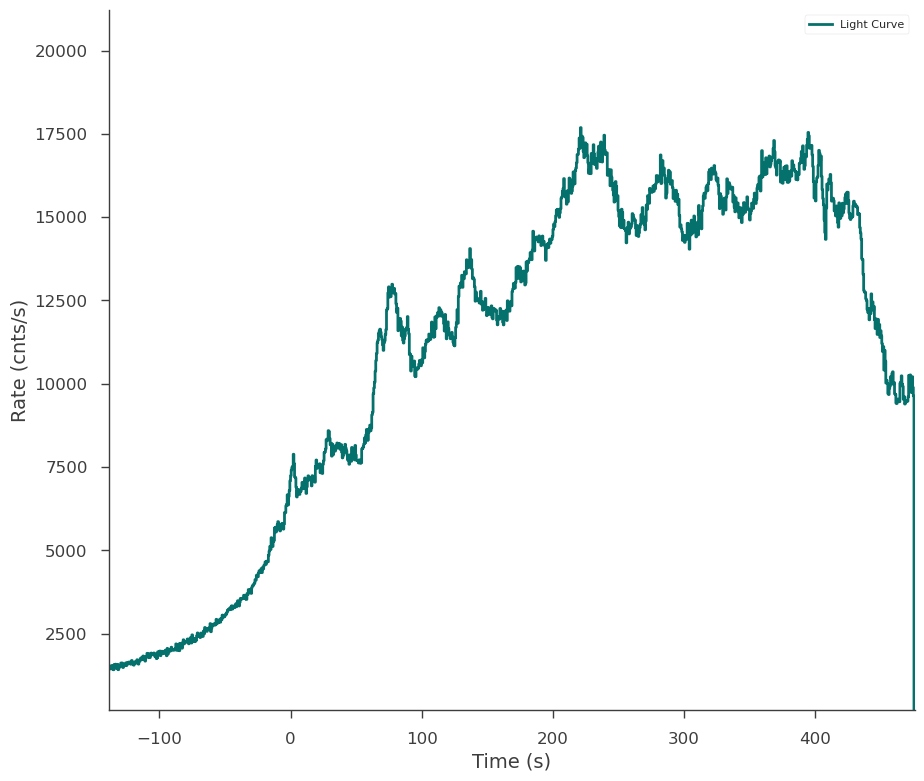

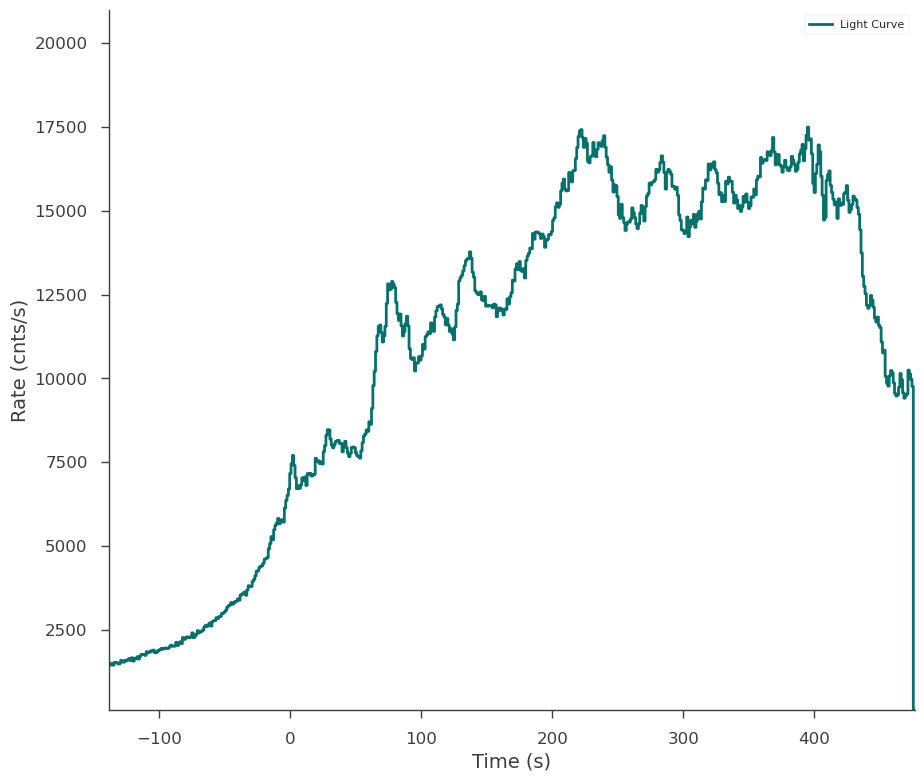

In [346]:
bins = [0.064,0.512,1.024]
detno = 1
det_name = bright_nais[detno]
print(det_name)
ts = TimeSeriesBuilder.from_gbm_tte(
                                    'temp', 
                                    tte_file=NaI_detectors[detno], 
                                    rsp_file=rsp_NaI_files[detno])

best_bin = bins[0]
best_sig = 0

for bin in bins:
        fig = ts.view_lightcurve(cmin, cmax, dt = bin)

In [347]:
# set background interval
background_interval = ["-130 - -50","450 - 475"]
ts.set_background_interval(*background_interval)

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:48:18 INFO      Auto-determined polynomial order: 3                                            ]8;id=823843;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=509443;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:48:29 INFO      None 3-order polynomial fit with the mle method                               ]8;id=742834;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=585998;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

In [355]:
def extract_float_range(input_string):
    try:
        # Split the string by the hyphen and strip any whitespace
        parts = [part.strip() for part in input_string.split('-') if part.strip()]
        
        # Convert each part to a float
        start = float(parts[0])
        end = float(parts[-1])  # Use -1 index in case there are multiple hyphens
        
        return start, end
    except (ValueError, IndexError):
        # Return None if the conversion fails or the format is incorrect
        return None, None
_,st = extract_float_range(background_interval[0])
sp,_ = extract_float_range(background_interval[1])

In [358]:
print(st,sp)

50.0 450.0


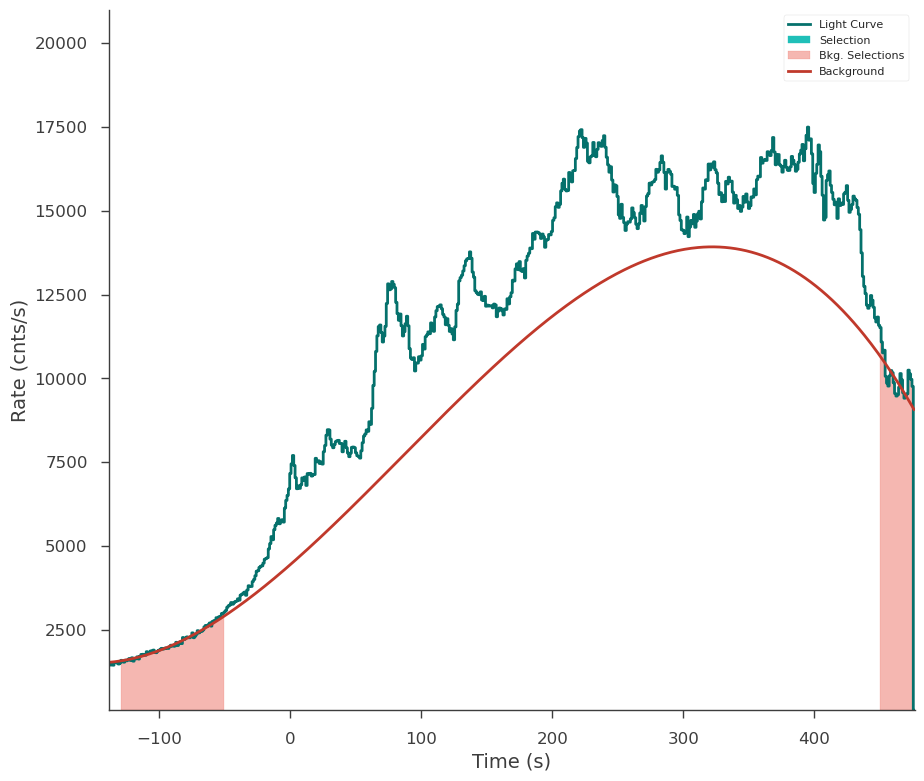

In [356]:
fig = ts.view_lightcurve(cmin, cmax, dt = 1.024)

In [357]:
best_sig = 0
best_sig_bin = 0
best_sig_rate = 0
peak = 0
peak_sig = 0
peak_bin = 0

for bin in bins:
    ts.create_time_bins(start=st, stop=sp, method='constant',dt = bin)
    for sig,tot,bin_no in zip (ts.significance_per_interval,ts.total_counts_per_interval,ts.bins):
        if best_sig < sig:
            best_sig = sig
            best_sig_bin = bin_no
            best_sig_rate = tot/bin
        if peak < (tot / bin):
            peak = tot / bin
            peak_sig = sig
            peak_bin = bin_no

23:51:59 INFO      Created 6250 bins via constant                                        ]8;id=413287;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=472283;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

23:54:39 INFO      Created 782 bins via constant                                         ]8;id=111743;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=280709;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

23:54:59 INFO      Created 391 bins via constant                                         ]8;id=271272;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=88716;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

In [359]:
print(best_sig)
print(best_sig_rate)
print(best_sig_bin)
print(peak_sig)
print(peak)
print(peak_bin)

40.089827454731356
12500.0
time interval 74.57603600120547 - 75.60003600120547 (duration: 1.024000000000001)
10.442419829465539
17921.875
time interval 225.4240360012056 - 225.4880360012056 (duration: 0.06399999999999295)


In [360]:
sbin = best_sig_bin

In [361]:
import re

def process_time_interval(input_string, decimal_places=3):
    # Use regular expression to extract the time interval
    match = re.search(r'(time interval\s+)(-?\d+\.\d+)\s*-\s*(-?\d+\.\d+)(\s+\(duration:.+\))', input_string)
    
    if match:
        # Extract parts of the string
        prefix = match.group(1)
        start = float(match.group(2))
        end = float(match.group(3))
        suffix = match.group(4)
        
        # Round to specified number of decimal places
        start_rounded = round(start, decimal_places)
        end_rounded = round(end, decimal_places)
        
        # Create rounded original string
        rounded_original = f"{prefix}{start_rounded} - {end_rounded}{suffix}"
        
        # Create simplified string
        simplified = f"{start_rounded} - {end_rounded}"
        
        return rounded_original, simplified
    else:
        return "Invalid input format", "Invalid input format"

In [362]:
gt , si = process_time_interval(str(sbin),4)

23:55:14 INFO      Interval set to 74.576-75.6 for temp                                  ]8;id=807031;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=747781;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=877455;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=70910;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=187428;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=744249;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=644112;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=115334;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 4-123                                    ]8;id=337995;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=411411;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

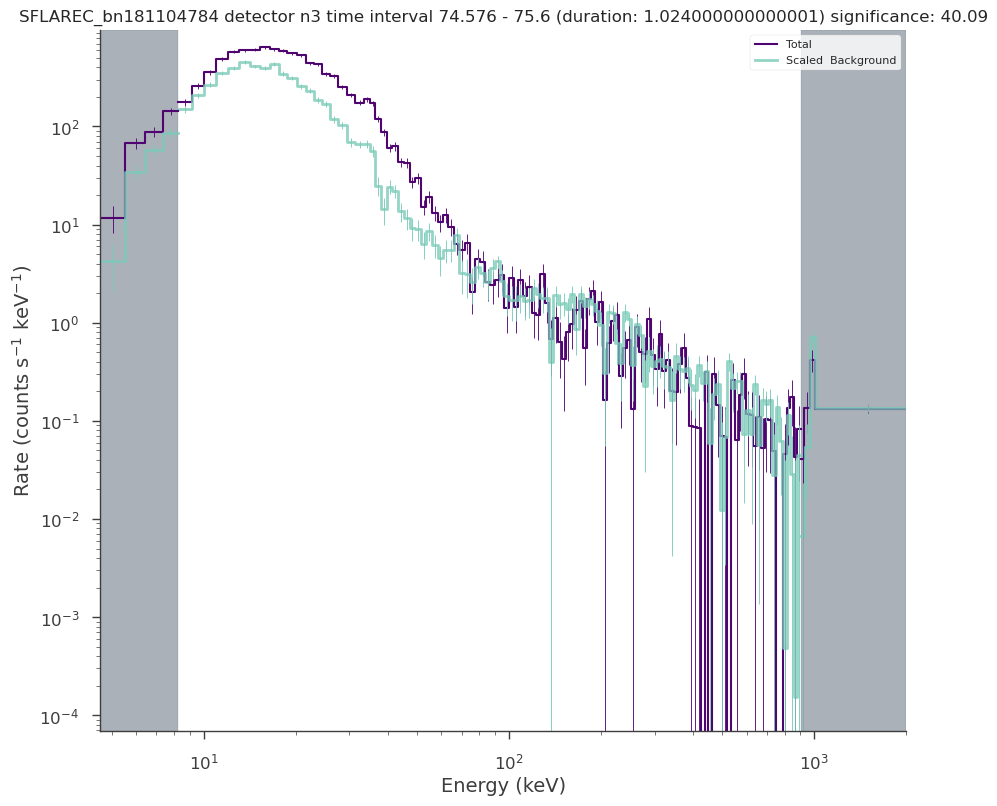

In [363]:
ts.set_active_time_interval(si)
fluence_plugin = ts.to_spectrumlike()
fluence_plugin.set_active_measurements("9-900")

fig = fluence_plugin.view_count_spectrum()
plt.title(en+' detector '+det_name +' '+ gt + f' significance: {best_sig:.2f}')
plt.show()